In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy


def draw_mst_overlay(G, T, pos, ax=None):
    """
    Draw the minimum spanning tree of a graph on top of the graph.
    """
    # If no axis is specified, create a new one
    if ax is None:
        ax = plt.gca()
    # Draw the graph
    nx.draw_networkx(G, pos=pos, ax=ax, node_color='tab:orange', edge_color='gray', node_size=500)

    # Draw the minimum spanning tree edges only
    nx.draw_networkx_edges(T, pos=pos, ax=ax, edge_color='tab:blue', width=5, alpha=0.5)

    # Draw edge weights
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=labels)

    # Remove the axis
    ax.axis('off')


def prims_algorithm(G, add_visualization=False, fig=None, pos=None):
    """
    Prims's algorithm for finding the minimum spanning tree of a graph.
    """

    steps = []

    # Initialize the minimum spanning tree
    T = nx.Graph()
    keys = list(G.nodes)
    parents = dict.fromkeys(keys)

    # Pick a random node to start from
    start_node = np.random.choice(keys)
    # start_node = keys[0]

    # Initialize the priority queue
    Q = {key: np.inf for key in keys}

    # Set the priority of the start node to 0
    Q[start_node] = 0

    # While the priority queue is not empty
    while Q:

        # Find the node with the minimum priority
        u = min(Q, key=Q.get)

        # Add the node to the minimum spanning tree
        T.add_node(u)

        # Add the edge to the minimum spanning tree
        if parents[u] is not None:
            T.add_edge(u, parents[u], weight=G.edges[u, parents[u]]['weight'])

        # Remove the node from the priority queue
        Q.pop(u)

        # For each neighbor of the node
        for v in G.neighbors(u):

            # If the neighbor is not in the minimum spanning tree
            if v not in T:

                # If the edge weight is less than the neighbor's priority
                if G.edges[u, v]['weight'] < Q[v]:
                    # Set the neighbor's parent to the current node
                    parents[v] = u

                    # Update the neighbor's priority
                    Q[v] = G.edges[u, v]['weight']

        # If visualization is enabled, draw the graph
        if add_visualization and fig is not None:
            steps.append(deepcopy(T))

    # If visualization is enabled, draw the graph
    if add_visualization and fig is not None:
        ncols = 2
        nrows = int(np.ceil(len(steps) / ncols))

        for i, T in enumerate(steps):
            ax = fig.add_subplot(nrows, ncols, i + 1)
            draw_mst_overlay(G, T, pos, ax=ax)
            ax.set_title(f'Step {i + 1}')

    # Return the minimum spanning tree
    return T

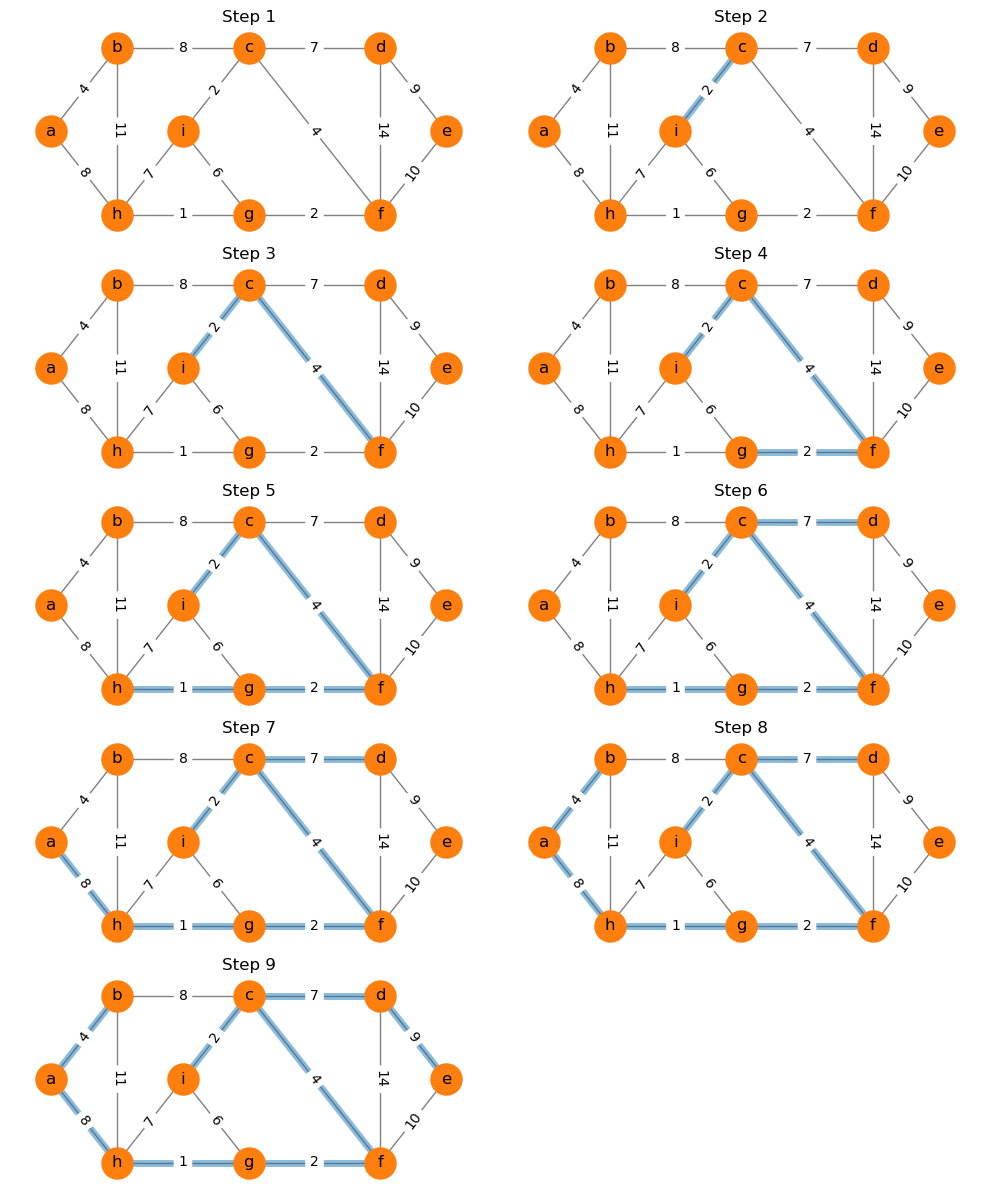

In [2]:

# Create a graph with nodes from a to i
G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])

G.add_weighted_edges_from([('a', 'b', 4), ('a', 'h', 8), ('b', 'c', 8),
                            ('b', 'h', 11), ('c', 'd', 7), ('c', 'f', 4),
                            ('c', 'i', 2), ('d', 'e', 9), ('d', 'f', 14),
                            ('e', 'f', 10), ('f', 'g', 2), ('g', 'h', 1),
                            ('g', 'i', 6), ('h', 'i', 7)])

# Visualize the graph
pos = {
    'a': (0, 1),
    'b': (1, 2),
    'c': (3, 2),
    'd': (5, 2),
    'e': (6, 1),
    'f': (5, 0),
    'g': (3, 0),
    'h': (1, 0),
    'i': (2, 1)
}

fig = plt.figure(figsize=(10, 12))

# Find the minimum spanning tree
T = prims_algorithm(G, add_visualization=True, fig=fig, pos=pos)

# Resize figure to show all subplots
fig.tight_layout()

plt.show()